# Exploratory Data Analysis

**Important Notes**
- This is an initial analysis on the available data, some results may change depending on the insights in the future
- Only used data for 2019 and computed the mean/average of the scores given by all the assessors and validators except for the Kruskal Wallis test to find out how the type of assessor affects performance/evaluation scores/rating
- Used the following scoring system (followed the previous analysis' scoring):

|Levels of Performance|Label|Range|
|:------|:------|:------|
|Achieved Standards     |A     |7     |
|Progressing     |B     |greater than 4 but less than 7     |
|Approaching     |C     |greater than 2 but less than or equal to 4     |
|Acquiring     |D     |less than or equal to 2    |


## Step 1 : Load libraries

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
import scipy.stats as ss
from collections import Counter
import math 
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 2: Read and transform data

In [2]:
# Reading the data on which analysis needs to be done
df_main = pd.read_excel("Data Source/SEED2019_RawData_yoy.xlsx", sheet_name='consolidated_data')
df_main.head()

,raw_score,Acquiring,Approaching,Progressing,Achieved Standards,Sort_PerformanceCode,2016-2018with Site Validation,2017-2018 with Site Validation,Comparison 2016-2018,Comparison 2017-2018,...,performance_value,evaluator_id,round_num,Comparison 2016-2019,Comparison 2017-2019,2019_concat_Name,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,7,0,0,0,1,4,1.0,1.0,3.0,2.0,...,4,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,2019_concat_Name
1,5,0,0,1,0,3,1.0,1.0,3.0,2.0,...,3,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN
2,5,0,0,1,0,3,1.0,1.0,3.0,2.0,...,3,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN
3,7,0,0,0,1,4,1.0,1.0,3.0,2.0,...,4,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN
4,7,0,0,0,1,4,1.0,1.0,3.0,2.0,...,4,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589365 entries, 0 to 589364
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   raw_score                       589365 non-null  int64  
 1   Acquiring                       589365 non-null  int64  
 2   Approaching                     589365 non-null  int64  
 3   Progressing                     589365 non-null  int64  
 4   Achieved Standards              589365 non-null  int64  
 5   Sort_PerformanceCode            589365 non-null  int64  
 6   2016-2018with Site Validation   85598 non-null   float64
 7   2017-2018 with Site Validation  85598 non-null   float64
 8   Comparison 2016-2018            362088 non-null  float64
 9   Comparison 2017-2018            362088 non-null  float64
 10  allSchools                      589365 non-null  object 
 11  allschools_year                 589365 non-null  object 
 12  2018_concatSchoo

## Step 3: Explore other features first 

_Under Construction_

In [4]:
df_exp = df_main[df_main['Year'] == 2019].reset_index()
df_school = df_exp[['school_name', 'Level']]
df_school = df_school.drop_duplicates(subset='school_name', keep='first').reset_index()
df_school.drop(columns='index', inplace=True, axis=1)

In [5]:
df_assessor = df_exp[['school_name', 'evaluator_id']]
df_assessor = df_assessor.drop_duplicates(subset=['school_name', 'evaluator_id'], keep='first').reset_index()

In [6]:
df_assessor = df_assessor.groupby(['school_name', 'evaluator_id'])['evaluator_id'].count()

In [7]:
# Read elem and high school files for address data
#dim = pd.read_excel("Data Source/RAW_2019_v2_.xlsx", sheet_name="mst_schools")
#elem = pd.read_excel("Data Source/PUBLIC ELEM EROLMENT SY 2017-2018.xlsx", sheet_name='School Details (DepEd)')
#hs = pd.read_excel("Data Source/PUBLIC SEC ENROLMENT SY 2017-2018.xlsx", sheet_name='School Details (DepEd)')

In [8]:
print("There are a total of %0.f elementary schools." % (len(df_school[df_school['Level']=='Elementary'])))
print("There are a total of %0.f secondary schools." % (len(df_school[df_school['Level']=='Secondary'])))

There are a total of 786 elementary schools.
There are a total of 309 secondary schools.


In [9]:
data_filtered = df_main[df_main['Year'] == 2019]
data_filtered = data_filtered[['school_name', 'kra_name', 'indicator', 'raw_score']]

In [10]:
data_grouped = data_filtered.groupby(['school_name', 'kra_name', 'indicator']).mean('raw_score').reset_index()
data_grouped.head()

,school_name,kra_name,indicator,raw_score
0,ABLAYAN ES,INSTRUCTION,Alignment of the Instructional Plan,5.571429
1,ABLAYAN ES,INSTRUCTION,Assessment of student performance,5.285714
2,ABLAYAN ES,INSTRUCTION,Classroom Management and Professionalism,5.285714
3,ABLAYAN ES,INSTRUCTION,Communication Skills (Written),5.285714
4,ABLAYAN ES,INSTRUCTION,Communication and Presentation Skills (Oral),4.428571


In [11]:
data_cat = data_grouped.copy()
data_cat['raw_score'] = np.where(data_cat['raw_score'] >= 7, "A", 
                            np.where(data_cat['raw_score'] >= 5, "B", 
                            np.where(data_cat['raw_score'] >= 3, "C", 
                            np.where(data_cat['raw_score'] >= 1, "D", "None"))))

In [12]:
data = data_cat.pivot(index='school_name', columns='indicator', values='raw_score').reset_index()
data.head()

indicator,school_name,Alignment of the Instructional Plan,Assessment of student performance,Asset Monitoring System,Budgeting Process,Classroom Management and Professionalism,Classroom Structure,"Clean and Green: Policies, Plans and Programs",Cohort Survival Rate,Communication Skills (Written),...,School Activities,"School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)",School Governing Council By-laws,School Governing Council Functionality,School Policies: Documentation and Dissemination,School Policies: Implementation,School Processes,Staff Assessment System,Student Motivation and Participation,Teacher Competence
0,ABLAYAN ES,B,B,C,C,B,B,C,B,B,...,B,C,C,B,B,B,C,C,C,B
1,ABUCAYAN ES,A,A,A,A,B,A,A,C,A,...,B,A,B,A,A,B,B,A,A,B
2,ABUGON ES,C,C,C,C,C,C,C,B,C,...,B,C,C,C,C,C,C,C,C,C
3,ADELA ES,B,B,D,D,B,B,C,B,B,...,C,C,D,D,B,B,C,C,B,B
4,AGBANGA ES,B,C,C,C,C,C,B,D,C,...,C,C,C,B,B,C,B,B,B,B


In [13]:
data_kra = data_grouped.groupby(['school_name', 'kra_name']).mean('raw_score').reset_index()
data_kra['raw_score'] = np.where(data_kra['raw_score'] >= 7, "A", 
                            np.where(data_kra['raw_score'] >= 5, "B", 
                            np.where(data_kra['raw_score'] >= 3, "C", 
                            np.where(data_kra['raw_score'] >= 1, "D", "None"))))
data_kra = data_kra.pivot(index='school_name', columns='kra_name', values='raw_score').reset_index()

In [14]:
data_kra

kra_name,school_name,INSTRUCTION,LEARNING ENVIRONMENT,ORGANIZATIONAL MANAGEMENT,PERFORMANCE
0,ABLAYAN ES,C,C,C,C
1,ABUCAYAN ES,B,B,B,B
2,ABUGON ES,C,C,C,B
3,ADELA ES,B,C,C,B
4,AGBANGA ES,C,C,C,C
...,...,...,...,...,...
1090,Zosimo E. Fabroa MNHS,B,B,C,C
1091,caduawan ES,C,C,C,C
1092,can-aga es,C,C,D,C
1093,catag PS,C,C,C,B


## Step 4: Explore and understand the features/independent variables

### Organizational Management

_(21 indicators)_
- Asset Monitoring System
- Budgeting Process
- Data Management System
- Enhanced School Improvement Plan vs. Vision-Mission-Goals
- Financial Procedures and Protocols
- Investment Program v.v. Priority Programs and Projects
- Organizational Framework
- Partnership and Linkages
- Plan and Implementation
- Priority Improvement Areas vs. ESIP
- Programs and Projects: Accomplishments
- Programs and Projects: Monitoring and Evaluation
- Recording of Financial Transactions
- Reporting of Financial Condition
- Resource mobilization projects and activities
- School Governing Council By-laws
- School Governing Council Functionality
- School Policies: Documentation and Dissemination
- School Policies: Implementation
- School Processes
- Staff Assessment System

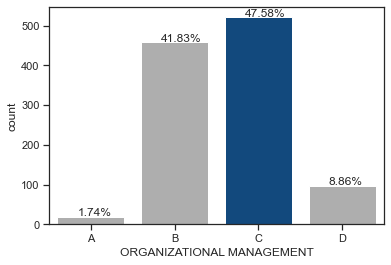

In [15]:
ax = sns.countplot(x='ORGANIZATIONAL MANAGEMENT', data=data_kra, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE','#AEAEAE', "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**Around 15%-20%** of schools **Achieved Standards (A)** for Enhanced School Improvement Plan vs. Vision-Mission-Goals, Financial Procedures and Protocols, Investment Program v.v. Priority Programs and Projects, Priority Improvement Areas vs. ESIP, and Reporting of Financial Condition.

### Instruction

_(15 indicators)_
- Alignment of the Instructional Plan
- Assessment of student performance
- Classroom Management and Professionalism
- Communication and Presentation Skills (Oral)
- Communication Skills (Written)
- Concepts and Skills Development
- Implementation of Instructional Intervention
- Instructional Assessment System
- Instructional Materials
- Integration of Education Trends
- Lesson Delivery
- Preparation
- Relevance of the Instructional Plan
- Student Motivation and Participation
- Teacher Competence

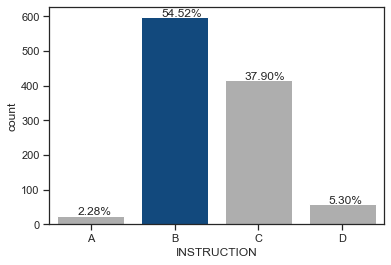

In [16]:
ax = sns.countplot(x='INSTRUCTION', data=data_kra, order=['A', 'B', 'C', 'D'], 
                   palette=['#AEAEAE',"#004A8F", '#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**Around 15%-20%** of schools **Achieved Standards (A)** on Alignment of the Instructional Plan, Instructional Materials, and Teacher Competence.

**Around 50%** of schools are **Progressing (B)** on all **Instruction** indicators except for Implementation of Instructional Intervention and Instructional Assessment System. 

### Learning Environment

_(5 indicators)_
- Classroom Structure
- Clean and Green: Policies, Plans and Programs
- Guidance Counseling and Health Clinic
- Safety and Security: Policies, Plans and Programs
- School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)

**47%** of schools are **Progressing (B)** on **Classroom Structure**. 

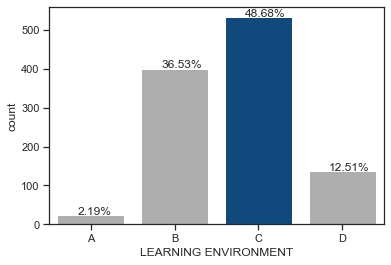

In [17]:
ax = sns.countplot(x='LEARNING ENVIRONMENT', data=data_kra, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE','#AEAEAE', "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**4.1 Organizational Management Indicators**

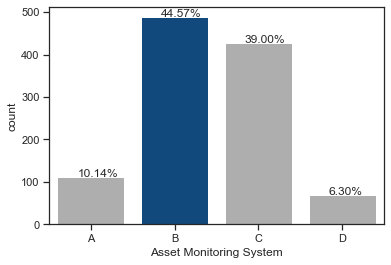

In [18]:
ax = sns.countplot(x='Asset Monitoring System', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

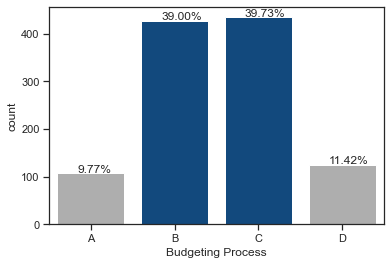

In [19]:
ax = sns.countplot(x='Budgeting Process', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

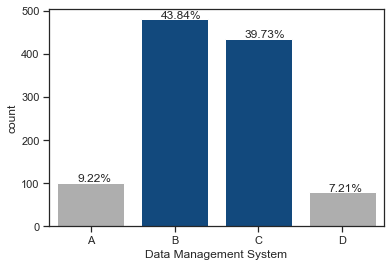

In [20]:
ax = sns.countplot(x='Data Management System', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

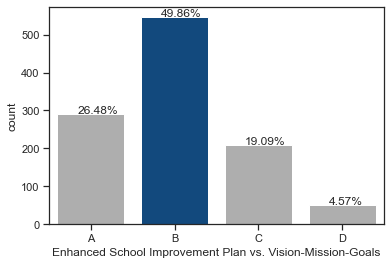

In [21]:
ax = sns.countplot(x='Enhanced School Improvement Plan vs. Vision-Mission-Goals', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

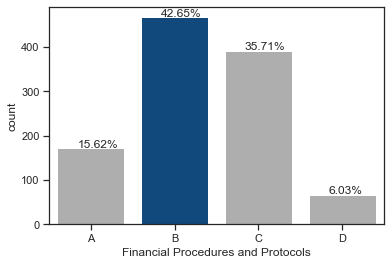

In [22]:
ax = sns.countplot(x='Financial Procedures and Protocols', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

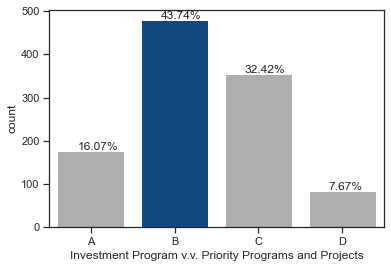

In [23]:
ax = sns.countplot(x='Investment Program v.v. Priority Programs and Projects', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

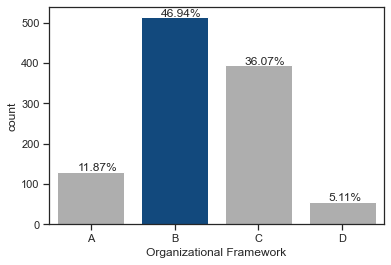

In [24]:
ax = sns.countplot(x='Organizational Framework', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

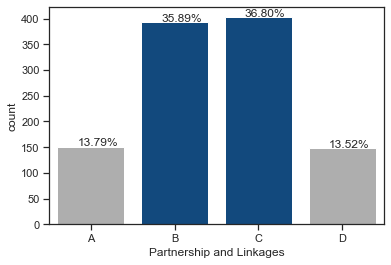

In [25]:
ax = sns.countplot(x='Partnership and Linkages', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

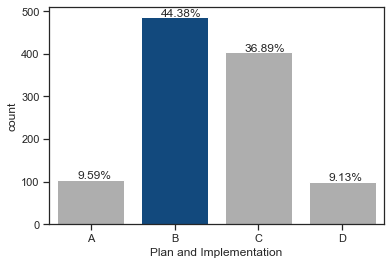

In [26]:
ax = sns.countplot(x='Plan and Implementation', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

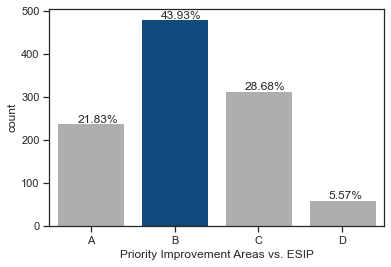

In [27]:
ax = sns.countplot(x='Priority Improvement Areas vs. ESIP', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

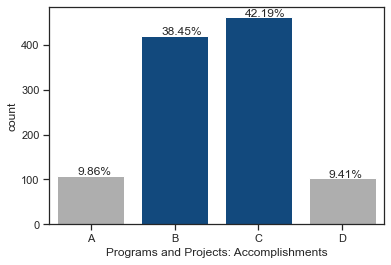

In [28]:
ax = sns.countplot(x='Programs and Projects: Accomplishments', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

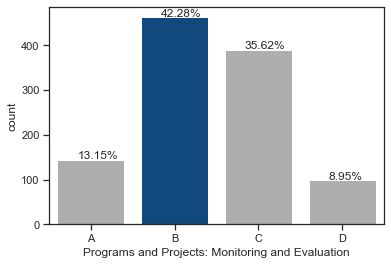

In [29]:
ax = sns.countplot(x='Programs and Projects: Monitoring and Evaluation', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

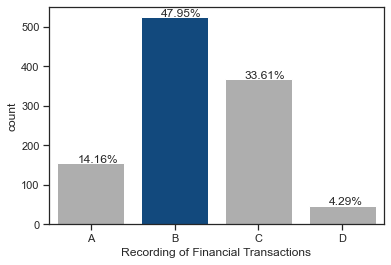

In [30]:
ax = sns.countplot(x='Recording of Financial Transactions', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

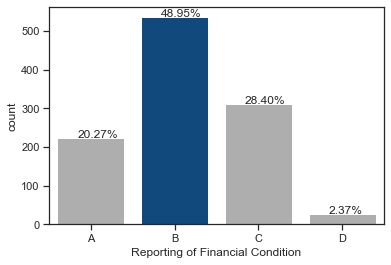

In [31]:
ax = sns.countplot(x='Reporting of Financial Condition', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

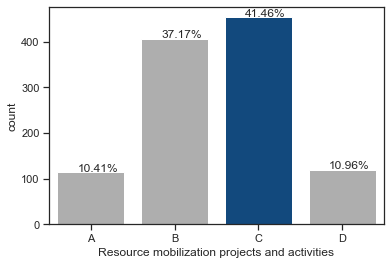

In [32]:
ax = sns.countplot(x='Resource mobilization projects and activities', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#AEAEAE", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

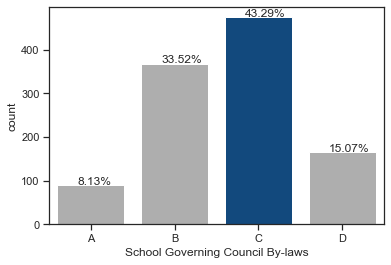

In [33]:
ax = sns.countplot(x='School Governing Council By-laws', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#AEAEAE", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

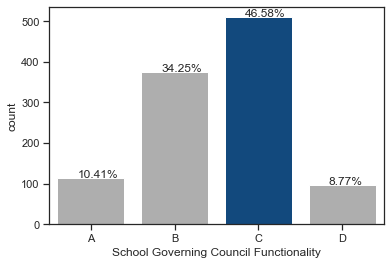

In [34]:
ax = sns.countplot(x='School Governing Council Functionality', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#AEAEAE", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

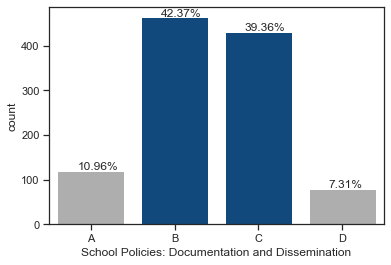

In [35]:
ax = sns.countplot(x='School Policies: Documentation and Dissemination', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

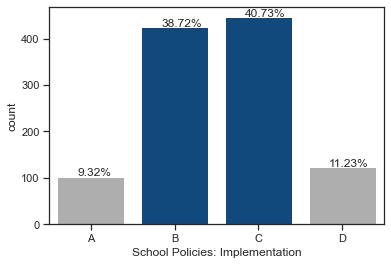

In [36]:
ax = sns.countplot(x='School Policies: Implementation', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

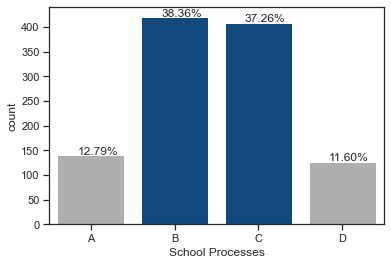

In [37]:
ax = sns.countplot(x='School Processes', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

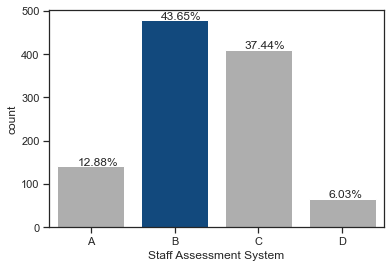

In [38]:
ax = sns.countplot(x='Staff Assessment System', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE',"#004A8F", "#AEAEAE", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**4.2 Instruction Indicators**

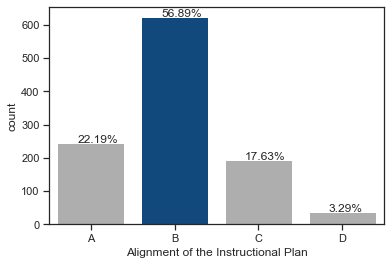

In [39]:
ax = sns.countplot(x='Alignment of the Instructional Plan', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

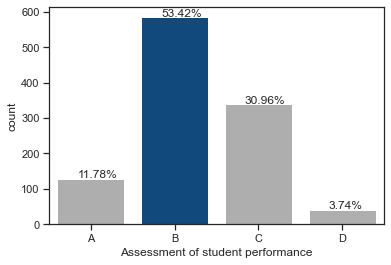

In [40]:
ax = sns.countplot(x='Assessment of student performance', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

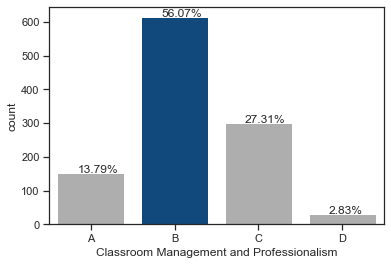

In [41]:
ax = sns.countplot(x='Classroom Management and Professionalism', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

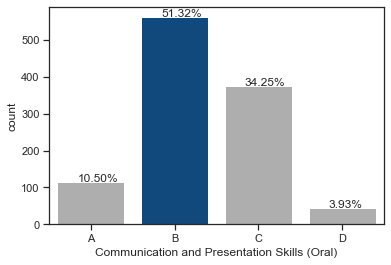

In [42]:
ax = sns.countplot(x='Communication and Presentation Skills (Oral)', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

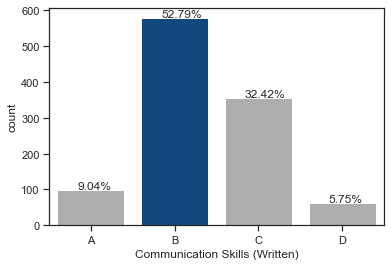

In [43]:
ax = sns.countplot(x='Communication Skills (Written)', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

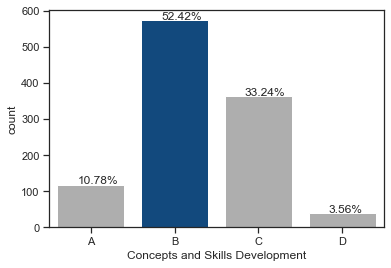

In [44]:
ax = sns.countplot(x='Concepts and Skills Development', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

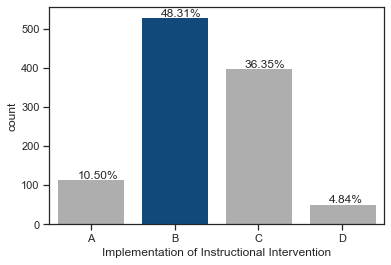

In [45]:
ax = sns.countplot(x='Implementation of Instructional Intervention', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

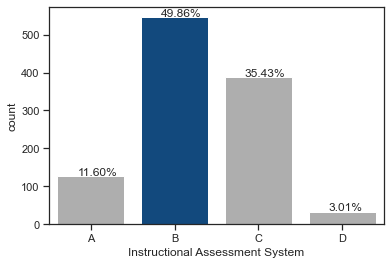

In [46]:
ax = sns.countplot(x='Instructional Assessment System', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

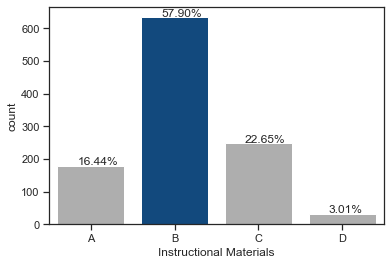

In [47]:
ax = sns.countplot(x='Instructional Materials', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

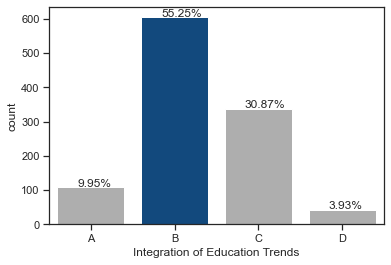

In [48]:
ax = sns.countplot(x='Integration of Education Trends', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

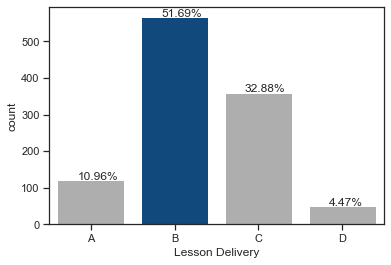

In [49]:
ax = sns.countplot(x='Lesson Delivery', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

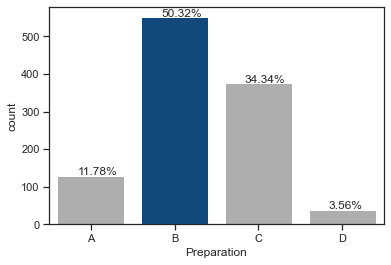

In [50]:
ax = sns.countplot(x='Preparation', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

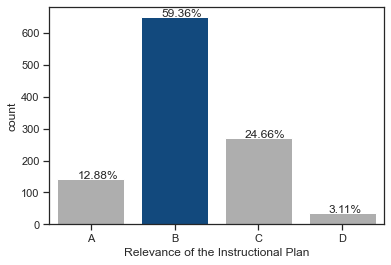

In [51]:
ax = sns.countplot(x='Relevance of the Instructional Plan', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

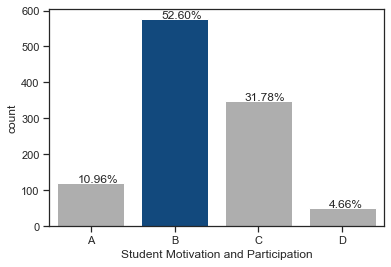

In [52]:
ax = sns.countplot(x='Student Motivation and Participation', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

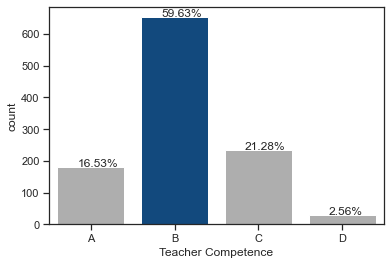

In [53]:
ax = sns.countplot(x='Teacher Competence', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**4.3 Learning Environment Indicators**

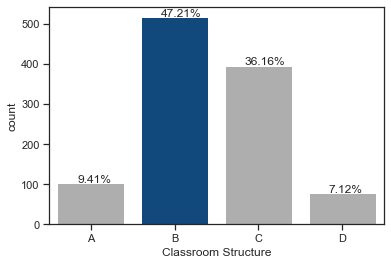

In [54]:
ax = sns.countplot(x='Classroom Structure', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

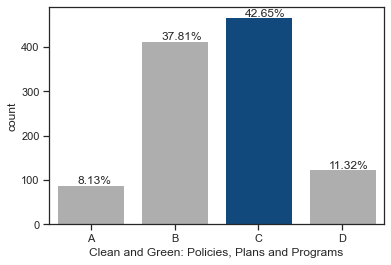

In [55]:
ax = sns.countplot(x='Clean and Green: Policies, Plans and Programs', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#AEAEAE",'#004A8F', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

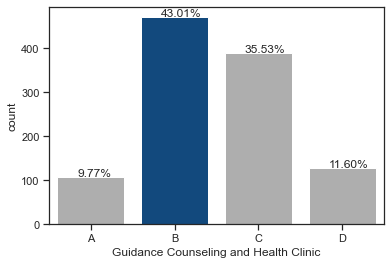

In [56]:
ax = sns.countplot(x='Guidance Counseling and Health Clinic', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

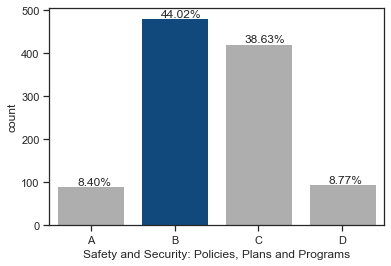

In [57]:
ax = sns.countplot(x='Safety and Security: Policies, Plans and Programs', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

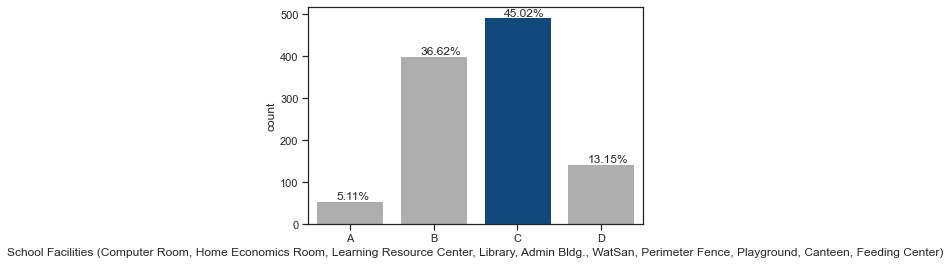

In [58]:
ax = sns.countplot(x='School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)', 
                   data=data, order=['A', 'B', 'C', 'D'], palette=['#AEAEAE','#AEAEAE', "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

# Step 5: Explore and understand the target/dependent variables

### Performance

_(7 indicators)_
- Drop-out Rate
- Repetition Rate
- Cohort Surival Rate
- Completion Rate
- Promotion Rate
- School Activities _(can be excluded)_
- Innovations to Improve School Performance Indicators _(can be excluded)_

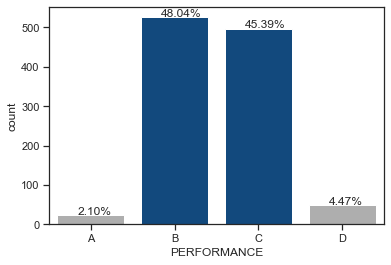

In [59]:
ax = sns.countplot(x='PERFORMANCE', data=data_kra, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**Around 15%-20%** of schools **Achieved Standards (A)** on Drop-out Rate, Repetition Rate, Cohort Survival Rate, Promotion Rate and **around 50%** of schools are **Progressing (B)** on a majority of the indicators.

**5.1 Drop-out Rate**

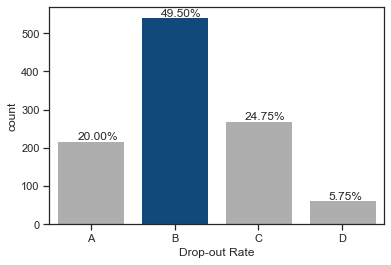

In [60]:
ax = sns.countplot(x='Drop-out Rate', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**5.2 Repetition Rate**

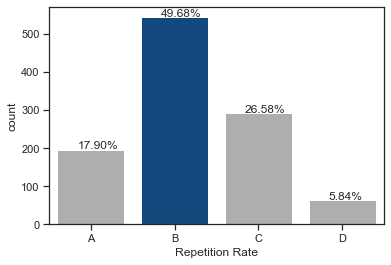

In [61]:
ax = sns.countplot(x='Repetition Rate', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**5.3 Cohort Survival Rate**

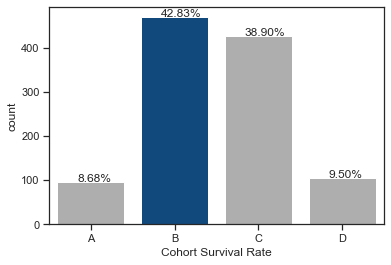

In [62]:
ax = sns.countplot(x='Cohort Survival Rate', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**5.4 Completion Rate**

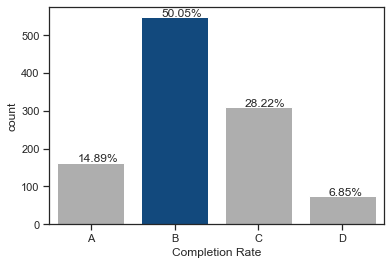

In [63]:
ax = sns.countplot(x='Completion Rate', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**5.5 Promotion Rate**

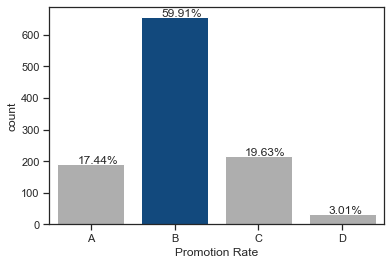

In [64]:
ax = sns.countplot(x='Promotion Rate', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**5.6 School Activities** *(can be excluded)*

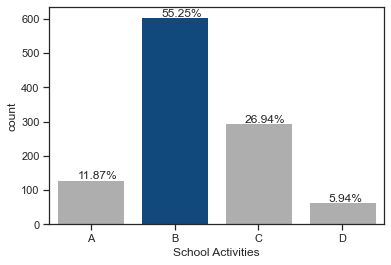

In [65]:
ax = sns.countplot(x='School Activities', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F",'#AEAEAE', '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

**5.7 Innovations to Improve School Performance Indicators** (can be excluded)*

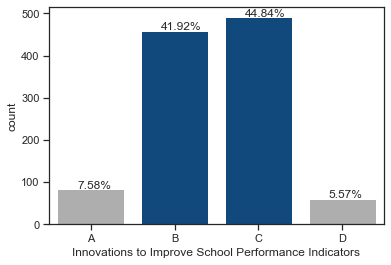

In [66]:
ax = sns.countplot(x='Innovations to Improve School Performance Indicators', data=data, order=['A', 'B', 'C', 'D'],
                  palette=['#AEAEAE', "#004A8F", "#004A8F", '#AEAEAE'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

In [67]:
print('The end.')

The end.
